In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 


In [2]:
# Step 1: Load the Excel file
file_path = 'watch_histry.xlsx'

In [3]:
# Load the data into a pandas DataFrame
watch_data = pd.read_excel(file_path)

In [4]:
# Display the first few rows to understand the structure
print("\nData Preview:")
print(watch_data.head())


Data Preview:
    header                                              title  \
0  YouTube  Watched Dammunte Pattukora Song | Pushpa 2 The...   
1  YouTube  Watched apps i ACTUALLY use to be productive a...   
2  YouTube  Watched M4 Pro MacBook Pro Initial Impressions...   
3  YouTube  Watched SECRETS you missed in our most VIRAL v...   
4  YouTube  Watched Marco -  Success Trailer | Unni Mukund...   

                                      titleUrl subtitles  \
0  https://www.youtube.com/watch?v=zU1wzpqwz-A    [List]   
1  https://www.youtube.com/watch?v=evyQlOEPljk    [List]   
2  https://www.youtube.com/watch?v=oybkatG38Rw    [List]   
3  https://www.youtube.com/watch?v=x87_zBnGFd4    [List]   
4  https://www.youtube.com/watch?v=4VQdzTv8E-g    [List]   

                       time products activityControls  
0  2024-12-30T14:15:55.845Z   [List]           [List]  
1  2024-12-30T14:15:03.682Z   [List]           [List]  
2  2024-12-30T14:12:54.355Z   [List]           [List]  
3  2024-1

In [5]:
# Step 2: Basic Data Information
print("\nData Information:")
print(watch_data.info())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46000 entries, 0 to 45999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   header            46000 non-null  object
 1   title             46000 non-null  object
 2   titleUrl          45996 non-null  object
 3   subtitles         44730 non-null  object
 4   time              46000 non-null  object
 5   products          46000 non-null  object
 6   activityControls  46000 non-null  object
dtypes: object(7)
memory usage: 2.5+ MB
None


In [6]:
print("\nSummary Statistics:")
print(watch_data.describe())


Summary Statistics:
         header                  title  \
count     46000                  46000   
unique        2                  34850   
top     YouTube  Watched Paris Ka Trip   
freq      34849                    104   

                                             titleUrl subtitles  \
count                                           45996     44730   
unique                                          35311         1   
top     https://music.youtube.com/watch?v=kETUJShx8lc    [List]   
freq                                              101     44730   

                            time products activityControls  
count                      46000    46000            46000  
unique                     45943        1                1  
top     2024-12-08T02:03:37.884Z   [List]           [List]  
freq                           3    46000            46000  


In [7]:
# Step 3: Data Cleaning
# Check for missing values
missing_values = watch_data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
header                 0
title                  0
titleUrl               4
subtitles           1270
time                   0
products               0
activityControls       0
dtype: int64


In [8]:
# Example cleaning:drop missing values  Fill or (customize as needed)
# Filling missing values in 'Category' column with 'Unknown'
if 'Category' in watch_data.columns:
    watch_data['Category'].fillna('Unknown', inplace=True)

In [9]:
# Step 4: Creating New Columns
# Assuming a column 'Title' exists, categorize based on keywords
categories = {
    'Education': ['tutorial', 'lesson', 'course'],
    'Entertainment': ['music', 'trailer', 'movie'],
    'News': ['news', 'update', 'report'],
    'Technology': ['review', 'tech', 'gadget'],
}

def categorize_title(title):
    for category, keywords in categories.items():
        if any(keyword.lower() in str(title).lower() for keyword in keywords):
            return category
    return 'Other'

watch_data['Category'] = watch_data['title'].apply(categorize_title)

In [10]:
print("Column Names:", watch_data.columns)


Column Names: Index(['header', 'title', 'titleUrl', 'subtitles', 'time', 'products',
       'activityControls', 'Category'],
      dtype='object')


In [11]:
# Step 5: Video Statistics Analysis
print("\nTotal Videos Watched:", len(watch_data))


Total Videos Watched: 46000


In [12]:
# Most-Watched Video
most_watched = watch_data['title'].value_counts().idxmax()
print("Most-Watched Video:", most_watched)

Most-Watched Video: Watched Paris Ka Trip


In [13]:
# Peak Watch Time (assuming a 'Date' column in datetime format)
if 'time' in watch_data.columns:
    watch_data['time'] = pd.to_datetime(watch_data['time'], errors='coerce')
    watch_data['Hour'] = watch_data['time'].dt.hour
    peak_time = watch_data['Hour'].value_counts().idxmax()
    print("Peak Watch Time (Hour):", peak_time)

Peak Watch Time (Hour): 16.0


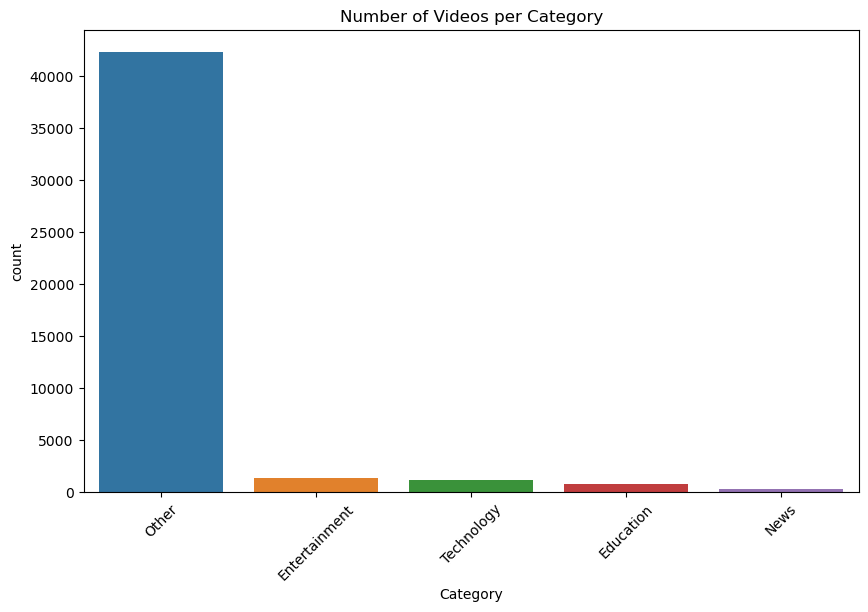

In [14]:
# Step 6: Visualization
# Category distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=watch_data, x='Category', order=watch_data['Category'].value_counts().index)
plt.title('Number of Videos per Category')
plt.xticks(rotation=45)
plt.show()


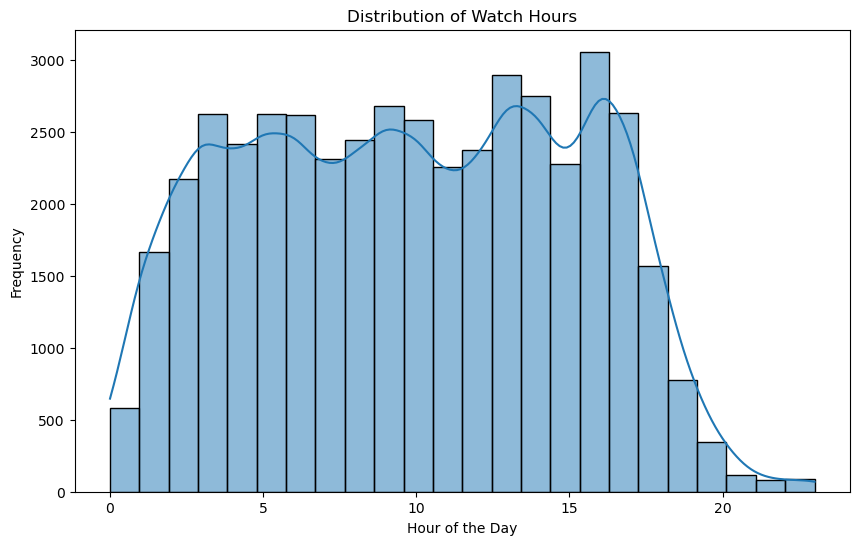

In [15]:
# Peak Time Distribution
if 'Hour' in watch_data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(watch_data['Hour'], bins=24, kde=True)
    plt.title('Distribution of Watch Hours')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Frequency')
    plt.show()

In [16]:
# Peak Watch Time (using 'time' column)
if 'time' in watch_data.columns:
    watch_data['time'] = pd.to_datetime(watch_data['time'], errors='coerce')
    watch_data['Hour'] = watch_data['time'].dt.hour
    peak_time = watch_data['Hour'].value_counts().idxmax()
    print("Peak Watch Time (Hour):", peak_time)

Peak Watch Time (Hour): 16.0


In [17]:
# Average Videos Watched Per User (assuming 'subtitles' as the user info)
if 'subtitles' in watch_data.columns:
    watch_data['User'] = watch_data['subtitles'].astype(str)
    avg_videos_per_user = watch_data['User'].value_counts().mean()
    print("Average Videos Watched Per User:", avg_videos_per_user)

Average Videos Watched Per User: 23000.0


In [18]:
# Videos Watched by Month
if 'time' in watch_data.columns:
    watch_data['Month'] = watch_data['time'].dt.to_period('M')
    monthly_videos = watch_data['Month'].value_counts().sort_index()
    print("\nVideos Watched by Month:")
    print(monthly_videos)


Videos Watched by Month:
Month
2022-10     866
2022-11    2626
2022-12    4117
2023-01    2099
2023-02    1177
2023-03    1092
2023-04    1450
2023-05    1362
2023-06     967
2023-07    1642
2023-08    1414
2023-09    1062
2023-10    1655
2023-11    2157
2023-12     966
2024-01    1008
2024-02     713
2024-03    1725
2024-04    1719
2024-05    1439
2024-06     995
2024-07    2840
2024-08    3231
2024-09    1972
2024-10    2575
2024-11    1315
2024-12    1761
Freq: M, Name: count, dtype: int64


C:\Users\fiziy\AppData\Local\Temp\ipykernel_1576\2814010899.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  watch_data['Month'] = watch_data['time'].dt.to_period('M')



Videos Watched per Year:
Year
2022.0     7609
2023.0    17043
2024.0    21293
Name: count, dtype: int64


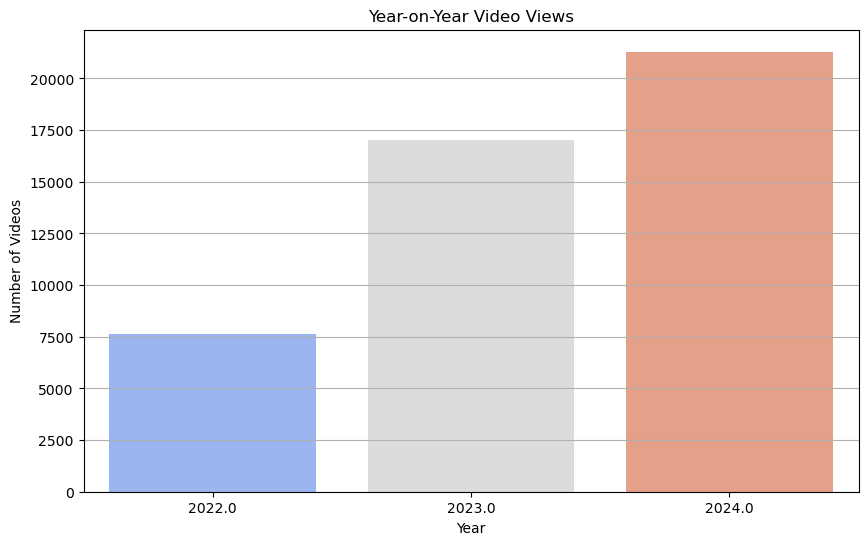

In [19]:
# Year-on-Year Comparison
if 'time' in watch_data.columns:
    watch_data['Year'] = watch_data['time'].dt.year
    yearly_videos = watch_data['Year'].value_counts().sort_index()
    print("\nVideos Watched per Year:")
    print(yearly_videos)
    
    # Visualization for year comparison
    plt.figure(figsize=(10, 6))
    sns.barplot(x=yearly_videos.index, y=yearly_videos.values, palette='coolwarm')
    plt.title('Year-on-Year Video Views')
    plt.xlabel('Year')
    plt.ylabel('Number of Videos')
    plt.grid(axis='y')
    plt.show()

In [20]:
# Ensure the 'time' column is in datetime format
watch_data['time'] = pd.to_datetime(watch_data['time'], errors='coerce')


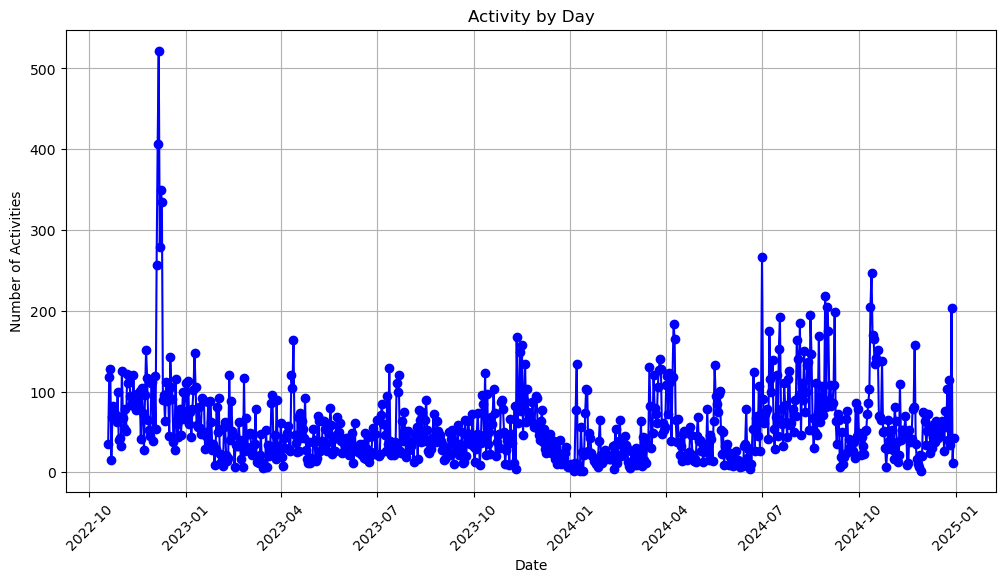

In [21]:
# Create a column for the date only (without time)
watch_data['date'] = watch_data['time'].dt.date

# Plot activity by day
plt.figure(figsize=(12, 6))
activity_by_day = watch_data['date'].value_counts().sort_index()
activity_by_day.plot(kind='line', color='b', marker='o')
plt.title('Activity by Day')
plt.xlabel('Date')
plt.ylabel('Number of Activities')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


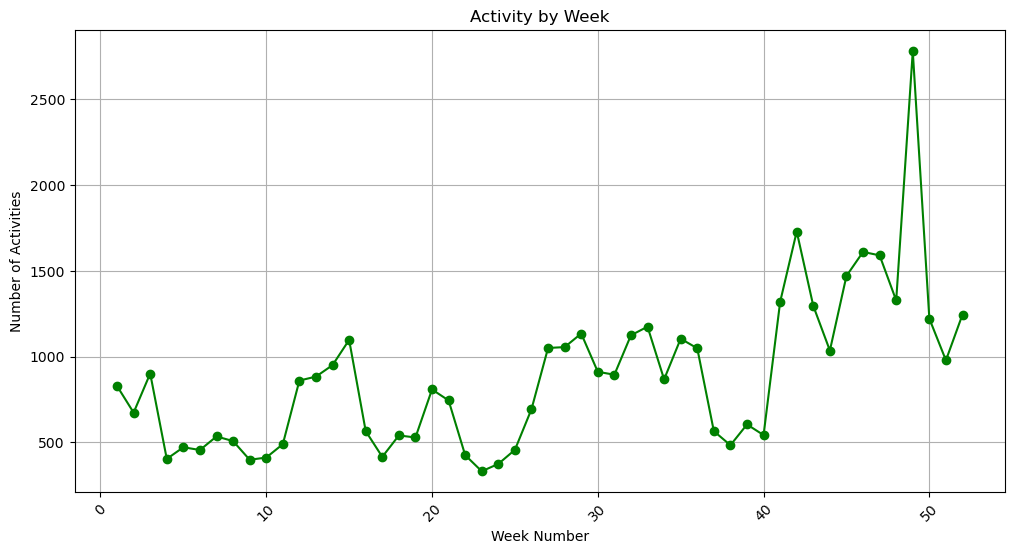

In [22]:
# Group by week
watch_data['week'] = watch_data['time'].dt.isocalendar().week
activity_by_week = watch_data['week'].value_counts().sort_index()

# Plot activity by week
plt.figure(figsize=(12, 6))
activity_by_week.plot(kind='line', color='g', marker='o')
plt.title('Activity by Week')
plt.xlabel('Week Number')
plt.ylabel('Number of Activities')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


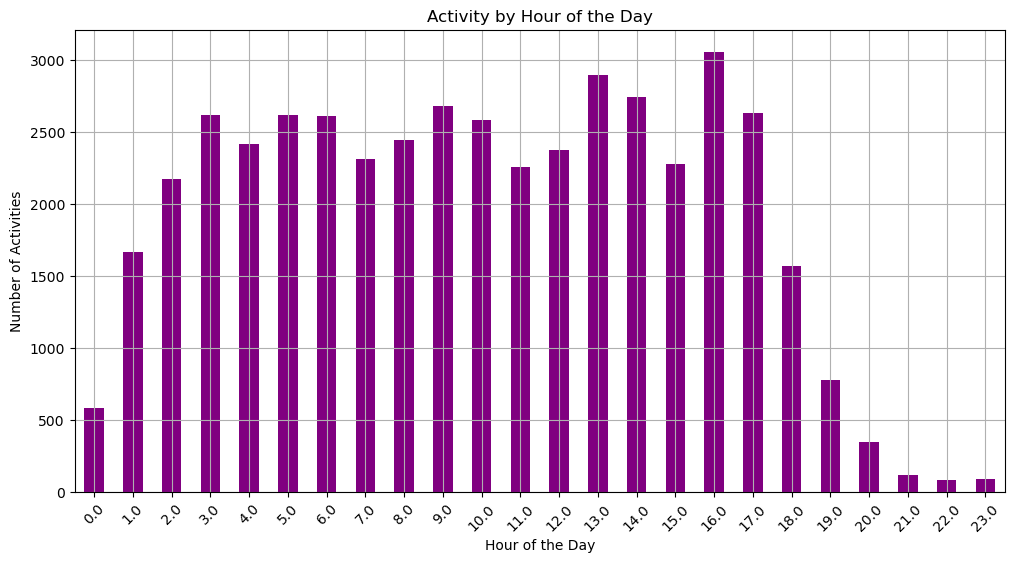

In [23]:
# Extract hour of the day
watch_data['hour'] = watch_data['time'].dt.hour

# Plot activity by hour of the day
plt.figure(figsize=(12, 6))
activity_by_hour = watch_data['hour'].value_counts().sort_index()
activity_by_hour.plot(kind='bar', color='purple')
plt.title('Activity by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Activities')
plt.xticks(np.arange(24), rotation=45)
plt.grid(True)
plt.show()


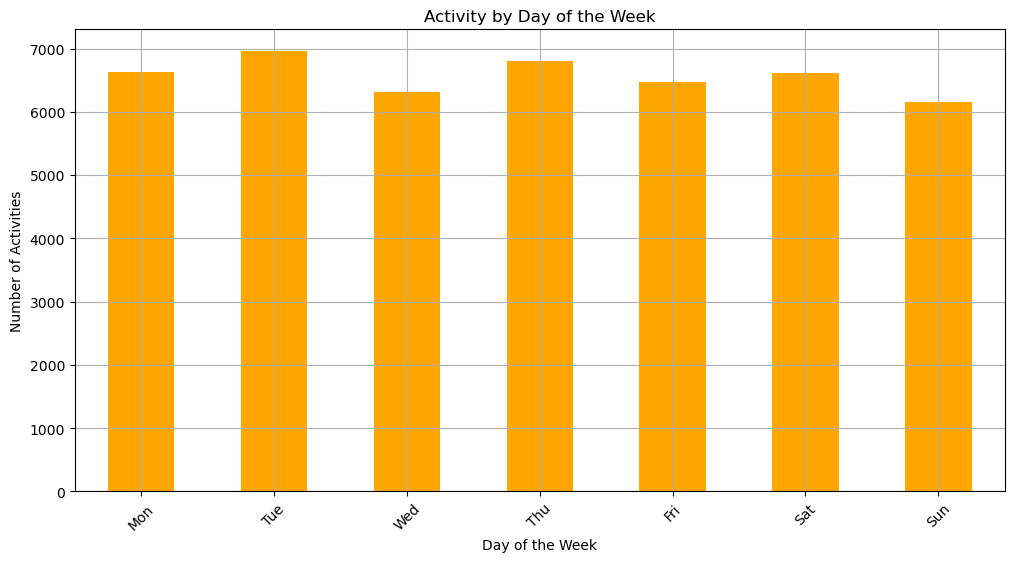

In [24]:
# Extract day of the week (0=Monday, 6=Sunday)
watch_data['day_of_week'] = watch_data['time'].dt.dayofweek

# Plot activity by day of the week
plt.figure(figsize=(12, 6))
activity_by_day_of_week = watch_data['day_of_week'].value_counts().sort_index()
activity_by_day_of_week.plot(kind='bar', color='orange')
plt.title('Activity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Activities')
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.grid(True)
plt.show()


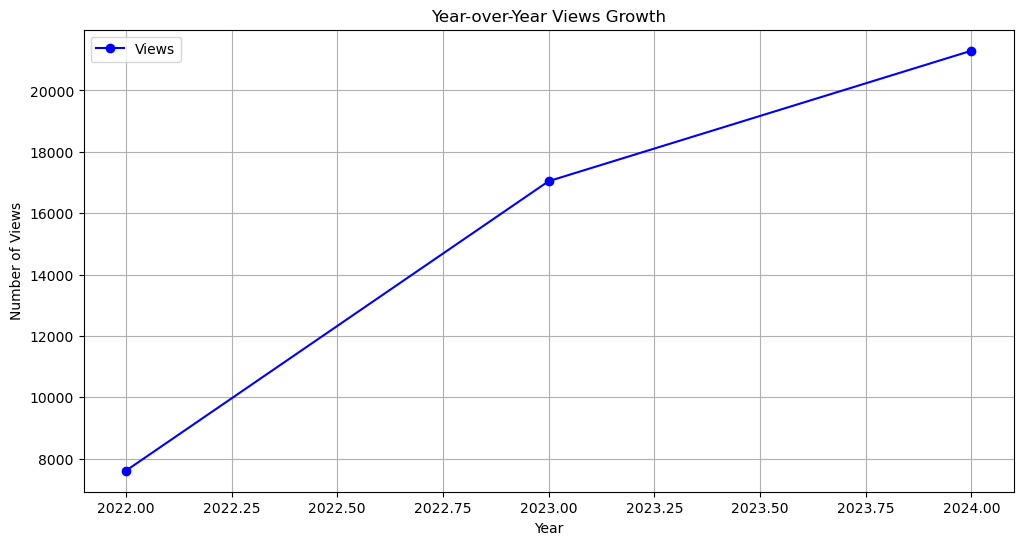

In [25]:
# Extract Year from the 'time' column
watch_data['year'] = watch_data['time'].dt.year

# Group by Year and count the number of activities (views, for example)
yearly_views = watch_data.groupby('year').size()

# Plot Year-over-Year Views Growth
plt.figure(figsize=(12, 6))
yearly_views.plot(kind='line', marker='o', color='b', label='Views')
plt.title('Year-over-Year Views Growth')
plt.xlabel('Year')
plt.ylabel('Number of Views')
plt.grid(True)
plt.legend()
plt.show()


<Figure size 1200x600 with 0 Axes>

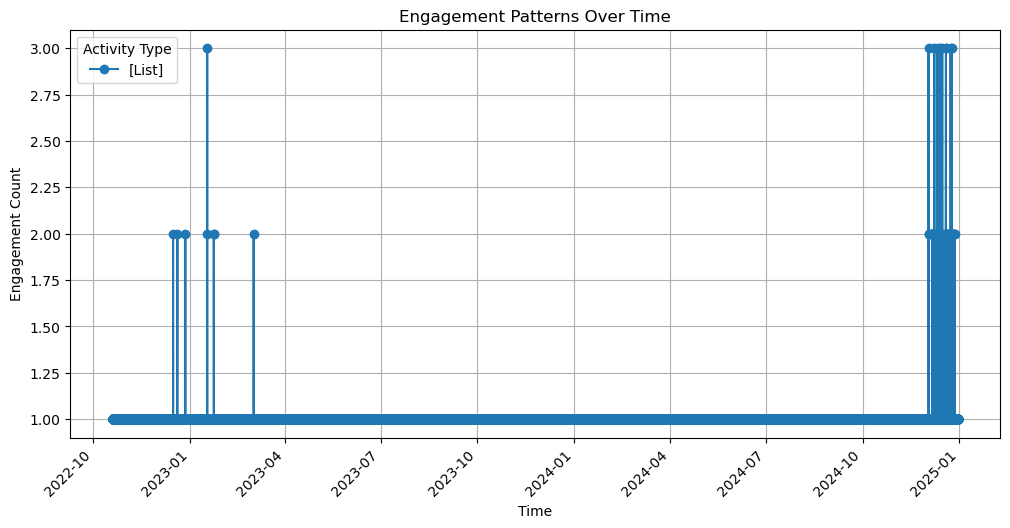

In [26]:
# Let's visualize the activity patterns by engagement controls (assuming activityControls represents engagement)
plt.figure(figsize=(12, 6))
watch_data['activityControls'] = watch_data['activityControls'].astype(str)  # Ensure the column is treated as categorical
watch_data.groupby('time')['activityControls'].value_counts().unstack().plot(kind='line', marker='o', figsize=(12, 6))

plt.title('Engagement Patterns Over Time')
plt.xlabel('Time')
plt.ylabel('Engagement Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Activity Type')
plt.show()



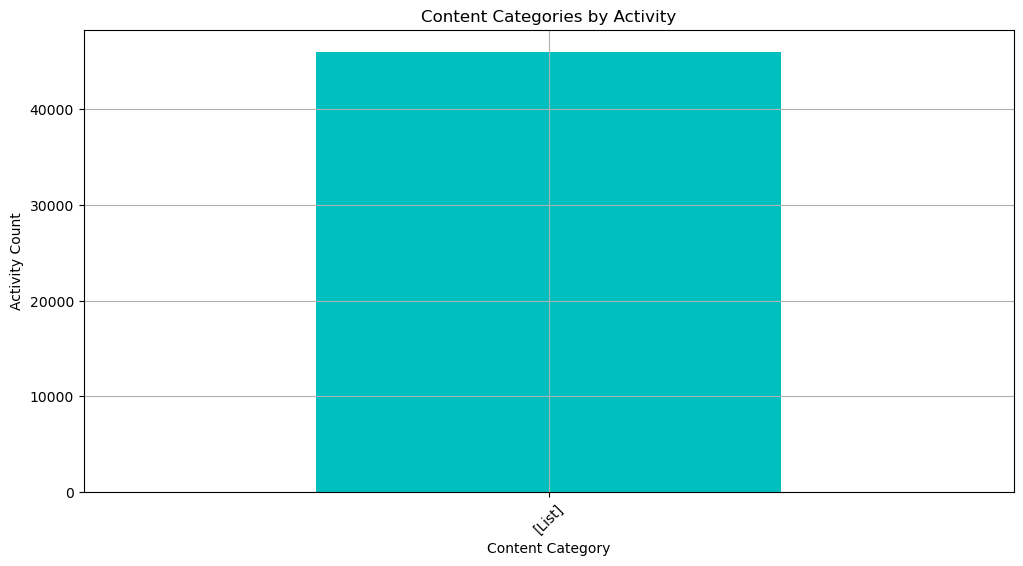

In [27]:
# Group by 'products' and count the number of activities
category_activity = watch_data['products'].value_counts()

# Plot the distribution of views across content categories
plt.figure(figsize=(12, 6))
category_activity.plot(kind='bar', color='c')
plt.title('Content Categories by Activity')
plt.xlabel('Content Category')
plt.ylabel('Activity Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
